# Image Analysis - Unit 01- Toy Datasets

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%201%20-%20Lesson%20Learning%20Outcome.png"> Lesson Learning Outcome

* **Image Analysis Lesson is made of 3 units**
* By the end of this lesson, you should be able to:
  * Evaluate Labels Distribution
  * Perform an Image Montage
  * Check Average Image and Image Variability
  * Check Contrast between 2 average images
  * Work with toy and real datasets
  * Understand the differences in terms of folder structure when downloading real image datasets

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

* Use a builtin toy dataset and explore: label distribution, deliver an image montage, conduct average image, image variability and contrast between 2 average images studies



---

Data Science has incredible applications when dealing with images, either static, like a photo, or dynamic, like a video.


<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Question%20mark%20icon.png
">
 **Why do we study Image Analysis?**
  * Because it is part of an effective EDA (Exploratory Data Analysis) on images to performe tasks like: understand label distribution, conduct an image montage, compute average image and image variability.


## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%203%20-%20Additional%20Learning%20Context.png"> Additional Learning Context

* We encourage you to:
  * Add **code cells and try it out** other possibilities, ie.: play around with parameters values in a function/method, or consider additional function parameters etc.
  * Also, **add your own comment** in the cells. It can help you to consolidate the learning. 


* Parameters in given function/method
  * As you may expect, a given function in a package may contain multiple parameters. 
  * Some of them are mandatory to declare; some have pre-defined values; and some are optional. We will cover the most common parameters used/employed at Data Science for a particular function/method. 
  * However, you may seek additional in the respecive package documentation, where you will find instructions on how to use a given function/method. The studied packages are open source, so this documentation is public.


---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Image Analysis - Toy Dataset 


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> We haven't studied TensorFlow yet, but in this lesson we will use TensorFlow toy datasets. These are datasets used for learning, meaning they will be useful to understand the concepts for Image Analysis. 
* Later in this lesson, we will use real images, where there are additional processes before analyzing the images


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> For now, we will use a dataset called mnist, which is a collection of handwritten numbers from 0 to 9, all in 28 x 28 pixels
* We will load the data into a train and test sets

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Let's check train and test set size
* We will notice the image has only 1 channel (gray scale). 
* If it was colored it would show (60000, 28, 28, 3) for RGB or (60000, 28, 28, 4) for RGBA

print(x_train.shape)
print(x_test.shape)

As we expect, the data is a NumPy array

type(x_train)

We are using the function `plt.imshow()` to display a given image. The documentation is found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
* We will subset the array using a pointer (num variable). We randomly choose 27
* `plt.imshow()` gets the array to be displayed and, in this case, we set `cmap='gray'`, since it is a grayscale image
* We can see the number in the image and the respective actual value in the `y_train`

pointer = 88

print(f"array pointer = {pointer}")
print(f"x_train[{pointer}] shape: {x_train[pointer].shape}")
print(f"label: {y_train[pointer]}")

plt.imshow(x_train[pointer],cmap='gray')
plt.show()


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** play around with `pointer` by setting it to other values. 
* What is the max value you can use in this case?

Also, remove `cmap='gray'` and check the difference. When you don't set this parameter, it will show the default option: `'viridis'`.


pointer = max(y_train)

print(f"array pointer = {pointer}")
print(f"x_train[{pointer}] shape: {x_train[pointer].shape}")
print(f"label: {y_train[pointer]}")

plt.imshow(x_train[pointer],cmap='gray')
plt.show()


You can use `set()` to check the unique values in an array. That allows us to understand the labels present in the train set

set(y_train)

In the cell below assign a vlaue to a variable named pointer
* Use plt.imshow, x_train, pointer, and cmap
* Show plt

# Write your code here.
pointer = 13

print(f"label:{[y_train[pointer]]}")
# print(f"x_train: {[x_train[pointer]]}")
      
plt.imshow(x_train[pointer], cmap='gray')
plt.show()

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Labels Distribution

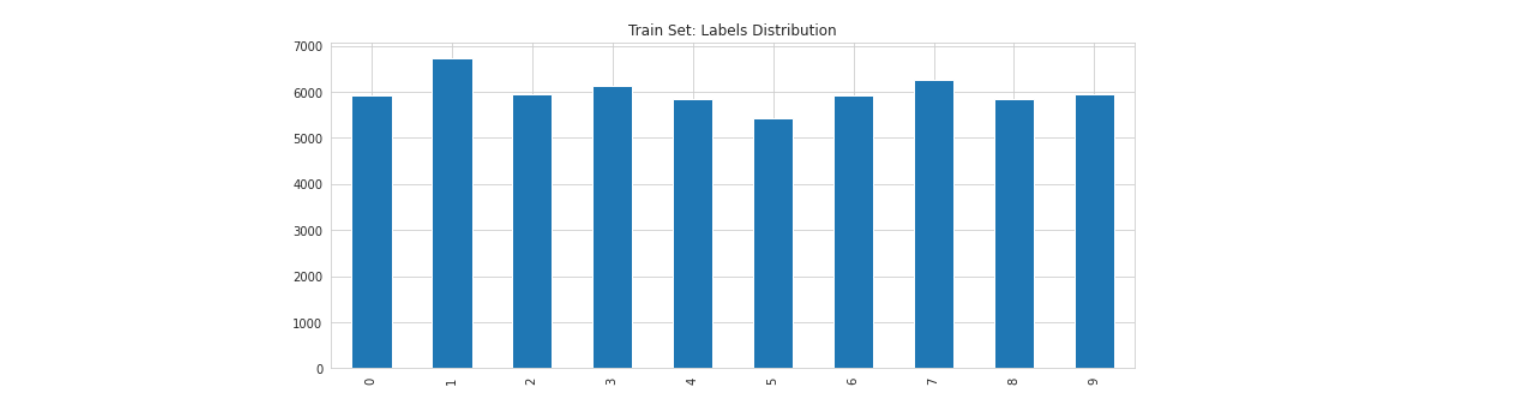

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> We will use the convention of **`label`**, as the levels or classes in a image dataset.
* For example, in mnist dataset, the labels are 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

We are interested to know if the target variable is balanced, that is, understand if the labels have similar frequency levels.
* We assess that with `.value_counts()` and a bar plot.
* We first convert the y_train array to a Pandas Series, then count the values, sort the index and plot with Pandas
* We notice the labels are fairly distributed.

sns.set_style('whitegrid')
pd.Series(data=y_train).value_counts().sort_index().plot(kind='bar',figsize=(12,5))
plt.title("Train Set: Labels Distribution")
plt.show()

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Image Montage

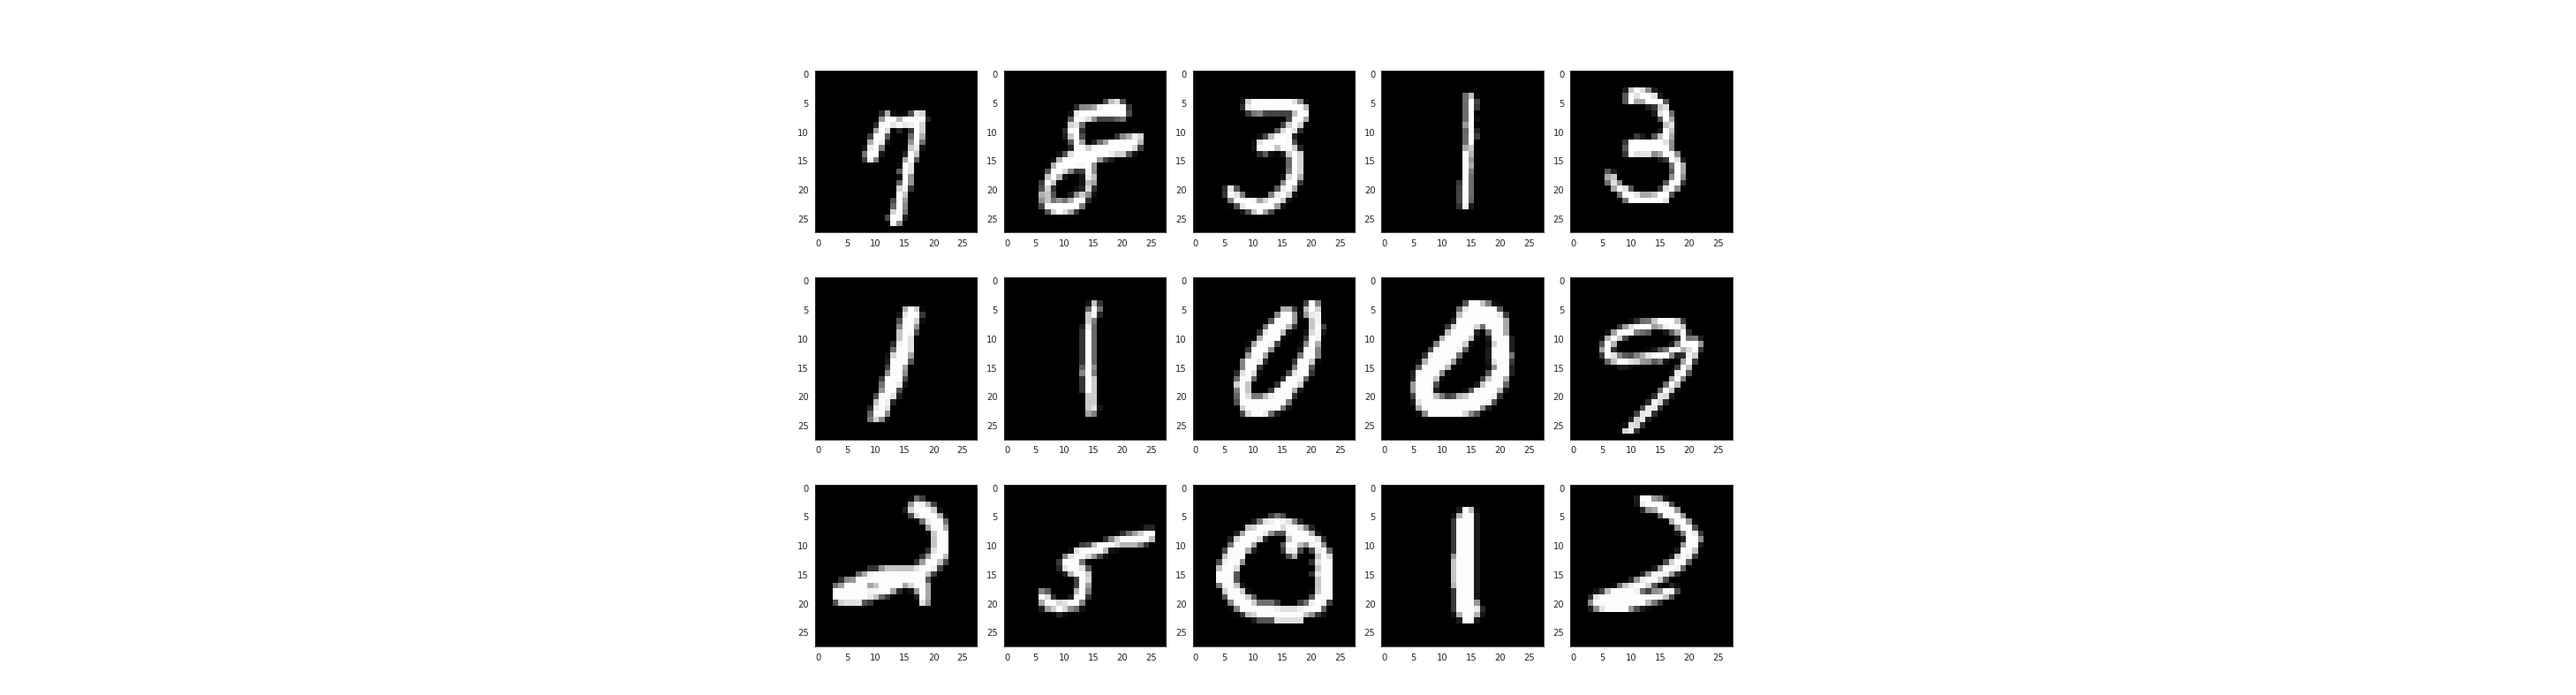

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> An Image Montage aims to display a grid of images per label
* We created a custom function for this task. We will not describe the specifics of the function. The function was made using the knowledge covered in the course and functionalities for creating a list with indices pair to plot in the image grid and randomly subset several images to be displayed

* The function arguments are: 
  * `X`: NumPy array with image data, 
  * `y`: NumPy array with target value, label_to_display, 
  * `nrows` and `ncols` to define the grid structure and 
  * `figsize`.


Read the pseudo code to better understand the function capabilities
  * It is resonable if, at first, you don't understand all the code from the function below. The central point is to make sense of the pseudo-code and understand the function parameters.

import itertools
import random

def image_montage_data_as_array(X, y,label_to_display, nrows, ncols, figsize=(15,10)):
  """
   The pseudo code for the function is:
  * Subset the label you are interested
  * If the label is not in the target array, shows montage with all labels
  * Check if your grid space is greater than the subset (nrows x ncols) size
  * Create list of axes indices based on nrows and ncols
  * Create a Figure and display images

  """
  sns.set_style("white")

  # subset the label you are interested to display
  if label_to_display in np.unique(y):
    y = y.reshape(-1,1,1)
    boolean_mask = np.any(y==label_to_display,axis=1).reshape(-1)
    df = X[boolean_mask]

  # if that label is not in the data, it shows an montage with all labels
  else:
    print("The class you selected doesn't exist.")
    print(f"The existing options are: {np.unique(y)}")
    print("Find below a montage with all labels")
    df = X

  # checks if your montage space is greater than subset size
  if nrows * ncols < df.shape[0]:
    img_idx = random.sample(range(0, df.shape[0]), nrows * ncols)
  else:
    print(
        f"Decrease nrows or ncols to create your montage. \n"
        f"There are {df.shape[0]} in your subset. "
        f"You requested a montage with {nrows * ncols} spaces")
    return
    
  # create list of axes indices based on nrows and ncols
  list_rows= range(0,nrows)
  list_cols= range(0,ncols)
  plot_idx = list(itertools.product(list_rows,list_cols))

  # create a Figure and display images
  fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=figsize)
  for x in range(0,nrows*ncols):
    axes[plot_idx[x][0], plot_idx[x][1]].imshow(df[img_idx[x]], cmap='gray')
  plt.tight_layout()
  plt.show()


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Let's display the label 8, in a 3 x 5 grid.
* Note how different the number 8 can be written!

image_montage_data_as_array(X=x_train, y=y_train,
              label_to_display=8,
              nrows=3, ncols=5,
              figsize=(15,10))

Do an exercise and change the label value 

image_montage_data_as_array(X=x_train, y=y_train,
              label_to_display=9,
              nrows=3, ncols=5,
              figsize=(15,10))

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** We will use another builtin dataset from TensorFlow for practice

from tensorflow.keras.datasets import fashion_mnist
(x_practice, y_practice), (x_practice_test, y_practice_test) = fashion_mnist.load_data()


Label	Description
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

Use your existing knowledge to asses the label distribution

# write the code here to assess label distribution
pointer = 88

print(f"array pointer = {pointer}")
print(f"x_train[{pointer}] shape: {x_practice[pointer].shape}")
print(f"label: {y_practice[pointer]}")

plt.imshow(x_practice[pointer],cmap='gray')
plt.show()


set(y_practice)

In the following cell, call the ``image_montage_data_as_array`` custom function to make a image montage
* choose a label from 0-9 

# Write your code here.
image_montage_data_as_array(X=x_practice, y=y_practice,
              label_to_display=8,
              nrows=3, ncols=5,
              figsize=(15,10))

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Average Image and Image Variability per Label

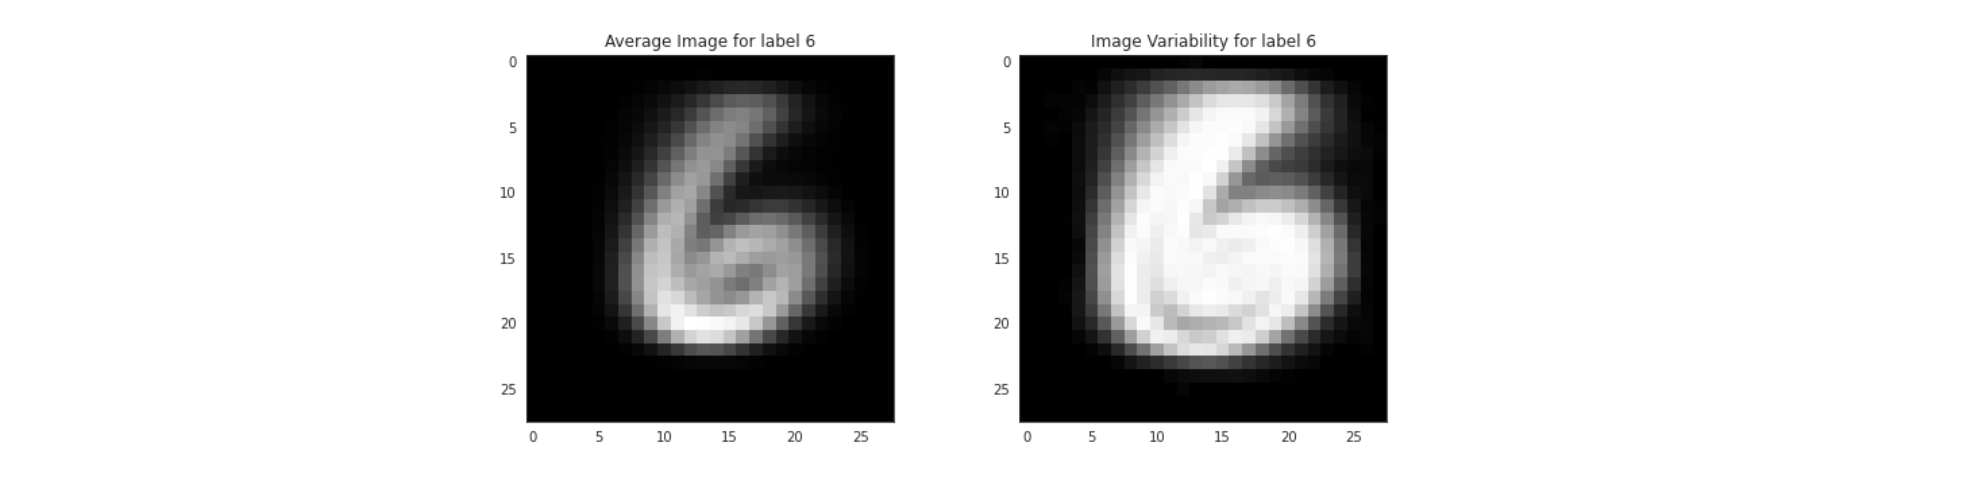

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> We noticed that for each label, the images would be slightly different from each other, but in general, we expect them to have a pattern

An Average Image and Image Variability per label helps to study these patterns
* An average image is when you subset all data (NumPy arrays) from a given label and calculate the average from the array values
* Image Variability is when you subset all data (NumPy arrays) from a given label and calculate the standard deviation from the array values


Read the pseudo-code to better understand the function capabilities
  * It is reasonable if, at first, you don't understand all the code from the function below. The central point is to make sense of the pseudo-code and understand the function parameters.


def image_avg_and_variability_data_as_array(X, y, figsize=(12,5)):
  """
   The pseudo code for the function is:
  * Loop through all labels
  * Subset an array for a given label
  * Calculate the average and standard deviation
  * Create a Figure displaying average and variability image

  """
  sns.set_style("white")

  for label_to_display in np.unique(y):

    y = y.reshape(-1,1,1)
    boolean_mask = np.any(y==label_to_display,axis=1).reshape(-1)
    arr = X[boolean_mask]

    avg_img = np.mean(arr, axis = 0)
    std_img = np.std(arr, axis = 0)
    print(f"==== Label {label_to_display} ====")
    print(f"Image Shape: {avg_img.shape}")
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    axes[0].set_title(f"Average Image for label {label_to_display}")
    axes[0].imshow(avg_img, cmap='gray')
    axes[1].set_title(f"Image Variability for label {label_to_display}")
    axes[1].imshow(std_img, cmap='gray')
    plt.show()
    print("\n")
  



<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> To help with the interpretation, consider the following guide:
* Check for the patterns where the color is darker or lighter
* For **Average Image**, we notice the general patterns for a given label
* For **Image Variability**, the lighter area indicates higher variability in that area. For example, for zero we see the middle is black (meaning all zeros tend not to have the middle filled) and a circled area is white (meaning the images tend to vary in this circled area)
* You will notice that the plots complement each other, since both show, from different angles, the image patterns.



image_avg_and_variability_data_as_array(X=x_train, y=y_train, figsize=(12,5))

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Note: There will be datasets where the images in a given label will have distinct shapes or patterns, and an average and variability study may not give the same amount of insights as we see in mnist dataset

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> For example, your dataset may contain images of fishes and birds from multiple species. 
* Eventually when you subset fishes and calculate an average image, the result will be a combination of patterns from multiple species of fishes, that may confuse a user that is not familiar with the context.

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Contrast between 2 Labels

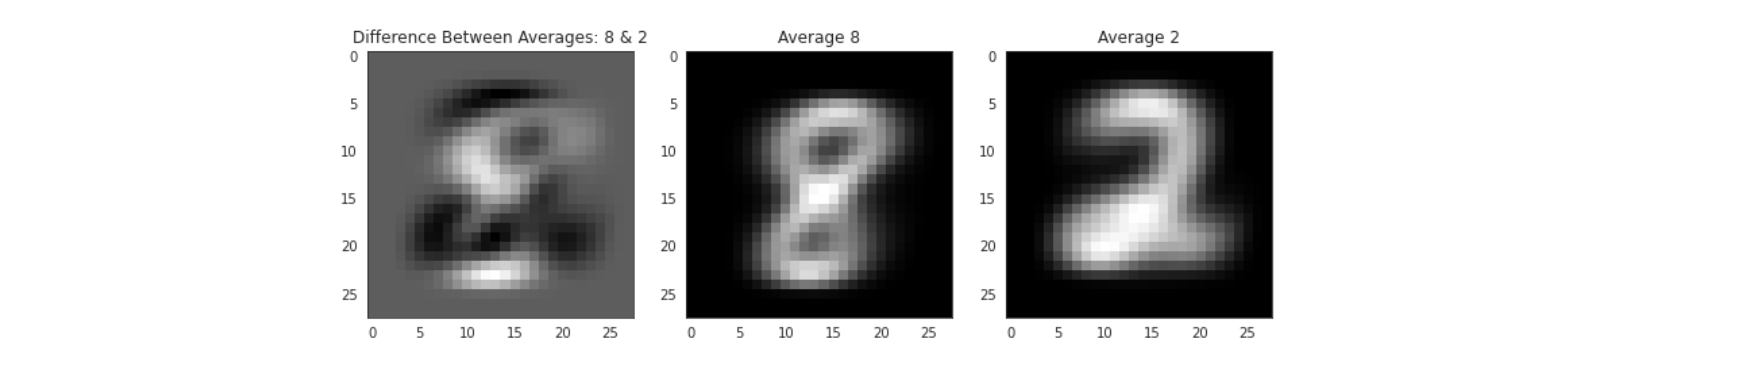

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Here we are interested to evaluate the contrast between 2 labels. 
* Which may provide additional insight to how the labels differ from each other

* We created a custom function contrast_between_2_labels_data_as_array() that computes that. The arguments are `X`, for the image data in NumPy array, `y` as the array indicating the label; `label_1` and `label_2` as the labels you are interested to compare and `figsize` to set figure size

  * It is reasonable if, at first, you don't understand all the code from the function below. The central point is to make sense of the pseudo-code and understand the function parameters.

def subset_image_label(X,y,label_to_display):
  y = y.reshape(-1,1,1)
  boolean_mask = np.any(y==label_to_display,axis=1).reshape(-1)
  df = X[boolean_mask]
  return df

def contrast_between_2_labels_data_as_array(X, y, label_1, label_2, figsize=(12,5)):
  sns.set_style("white")

  if (label_1 not in np.unique(y)) or (label_2 not in np.unique(y)):
    print(f"Either label {label} or label {label_2}, are not in {np.unique(y)} ")
    return

  # calculate mean from label1
  images_label = subset_image_label(X, y, label_1)
  label1_avg = np.mean(images_label, axis = 0)

  # calculate mean from label2
  images_label = subset_image_label(X, y, label_2)
  label2_avg = np.mean(images_label, axis = 0)

  # calculate difference and plot difference, avg label1 and avg label2
  contrast_mean = label1_avg - label2_avg
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
  axes[0].imshow(contrast_mean, cmap='gray')
  axes[0].set_title(f'Difference Between Averages: {label_1} & {label_2}')
  axes[1].imshow(label1_avg, cmap='gray')
  axes[1].set_title(f'Average {label_1}')
  axes[2].imshow(label2_avg, cmap='gray')
  axes[2].set_title(f'Average {label_2}')
  plt.show()


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> To help the interpretation, consider the following guide:
* You are comparing label_1 to label_2
* In the Difference Between Averages plot, the darker area shows where both average images are similar. The lighter area shows where average images are different

contrast_between_2_labels_data_as_array(X=x_train, y=y_train,
                                        label_1=8, label_2=2,
                                        figsize=(12,10)
                                        )

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> The same note from previous section applies here:
* There will be datasets where the images in a given label will have distinct shapes or patterns, and a contrast from averages study may not give the same amount of insights as we see in mnist dataset

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** Use your existing knowledge to assess the 
* average image, image variability per label, 
* and contrast between labels for x_practice and y_practice data

# write the code here to assess average image, image variability
image_avg_and_variability_data_as_array(X=x_practice, y=y_practice, figsize=(12,5))

# write the code here for contrast between 2 labels 
# We suggest you to try with few pairs of labels, so you can get comfortable with the data 
contrast_between_2_labels_data_as_array(X=x_practice, y=y_practice,
                                        label_1=7, label_2=4,
                                        figsize=(12,10)
                                        )

---